In [5]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Checking the vesion
print('The Pandas version is {}.'.format(pd.__version__))
print('The Numpy version is {}.'.format(np.__version__))
print('The Matplotlib version is {}.'.format(matplotlib.__version__))
print('The Seaborn version is {}.'.format(sns.__version__))

The Pandas version is 1.1.3.
The Numpy version is 1.18.5.
The Matplotlib version is 3.3.2.
The Seaborn version is 0.11.1.


In [7]:
#Display all the columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [8]:
#Loading the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Internship\Project\NLP\Fake news project\Fake news project\train_news.csv')
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [9]:
#Dataset has extra column Unnamed:0 So here I make it as our index.

df = pd.read_csv(r'C:\Users\HP\Desktop\Internship\Project\NLP\Fake news project\Fake news project\train_news.csv',
                  index_col='Unnamed: 0')
df.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [10]:
#Checking the shape of the dataset
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 20800 observations and 5 features in this dataset. 



In [11]:
#Checking the number of unique headlines
print("There are {} unique headlines in this dataset such as: \n\n{}...".format(len(df.headline.unique()),
                                                                           "\n\n".join(df.headline.unique()[0:5])))

There are 19804 unique headlines in this dataset such as: 

Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times

U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times

Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart

Paul LePage, Besieged Maine Governor, Sends Conflicting Signals Over Intentions - The New York Times

A Digital 9/11 If Trump Wins...


In [12]:
#Checking the information of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20800 non-null  int64 
 1   headline    20242 non-null  object
 2   written_by  18843 non-null  object
 3   news        20761 non-null  object
 4   label       20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 975.0+ KB


In [13]:
#Checking the label attribute
df.label.unique()

array([0, 1], dtype=int64)

### To check the missing values

In [14]:
#Checking the missing values in the dataset
df.isnull().values.any()

True

In [15]:
#Checking the number of missing values according to column wise
df.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

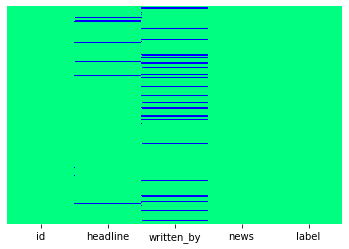

In [16]:
#Seeing the missing values via visualization
#plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='winter_r')
plt.show()

Observation:
     
     The maximum number of missing rows present  in headline, written_by columns and only few missing rows are present in 
     news column.So to visualize the missing number in bar plot we have to import the missingno as mnso.

In [17]:
#Importing the missing value
import missingno as mnso

<AxesSubplot:>

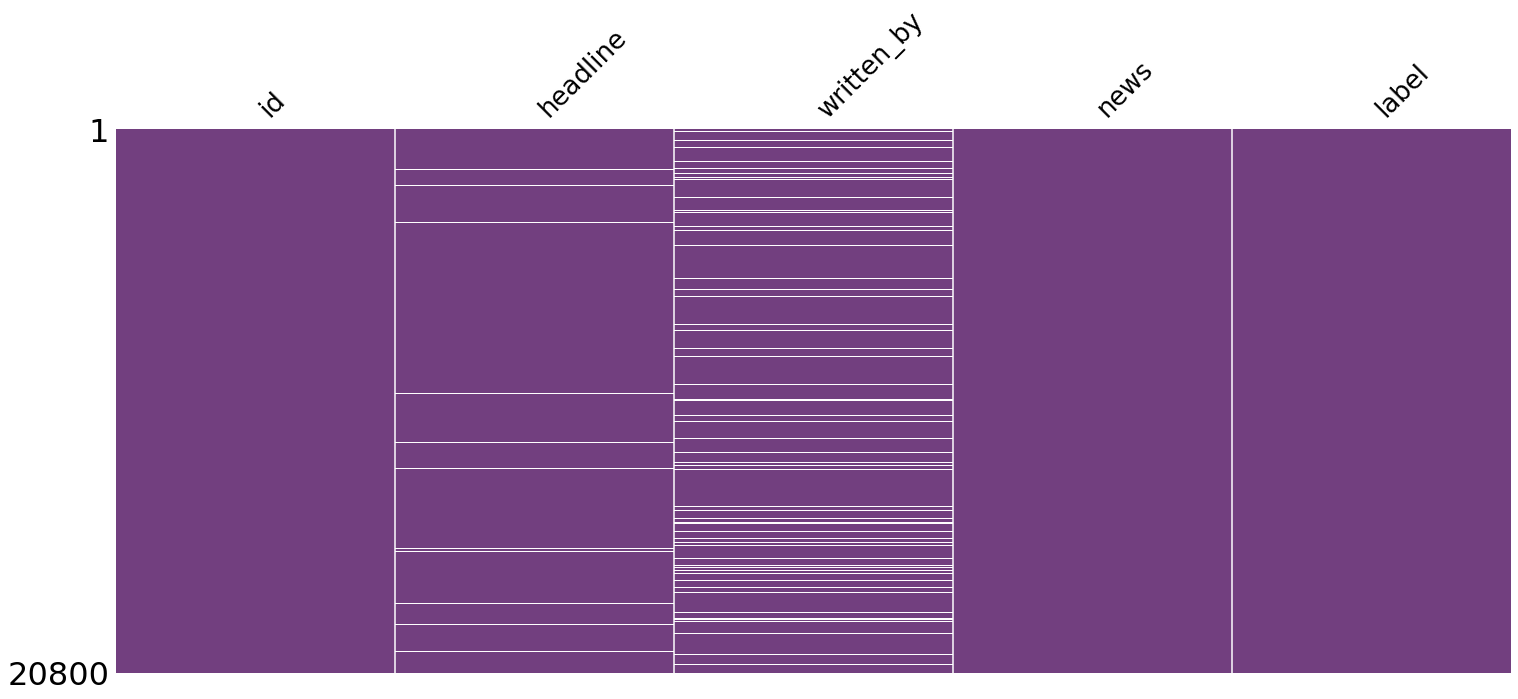

In [18]:
# Plotting the Missing value matrix

#plt.figurefigsize=(6,4)
mnso.matrix(df,color=(0.45, 0.25, 0.5),fontsize=26,sparkline=False)

Observation:

    From this view it is clear that some of the columns have the missing values which needs to be filled with mean,median
    or mode. But this dataset is text based so we cannot fill missing values with mean,median or mode. So we drop our 
    missing data.

<AxesSubplot:>

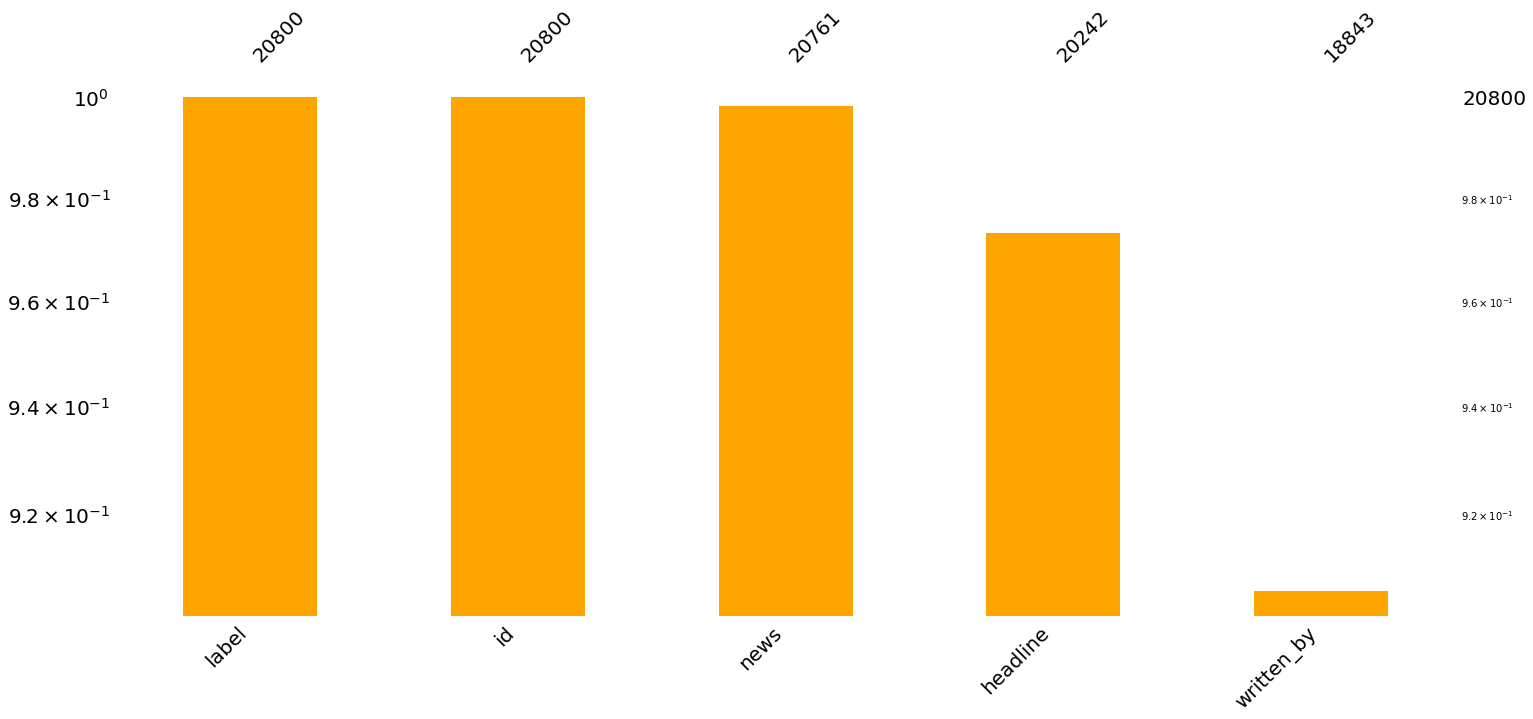

In [19]:
# Plotting the barplot of the null values.

plt.figure(figsize=(12,6))
mnso.bar(df, fontsize=20,color='orange',sort='descending',log=True)

Findings:

    Missing number bar plot, plots the graph of the number of non-missing values as well as providing the actual number of
    values present in the columns. We get an idea of how much of each column is missing.

Observation:

    We have to remove the rows which have null values because it is a text data so we cannot fill it. So I'll drop them.

In [20]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]


## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

headline 0.0268  % missing values
written_by 0.0941  % missing values
news 0.0019  % missing values


In [21]:
###Droping Nan Values
df=df.dropna()

<AxesSubplot:>

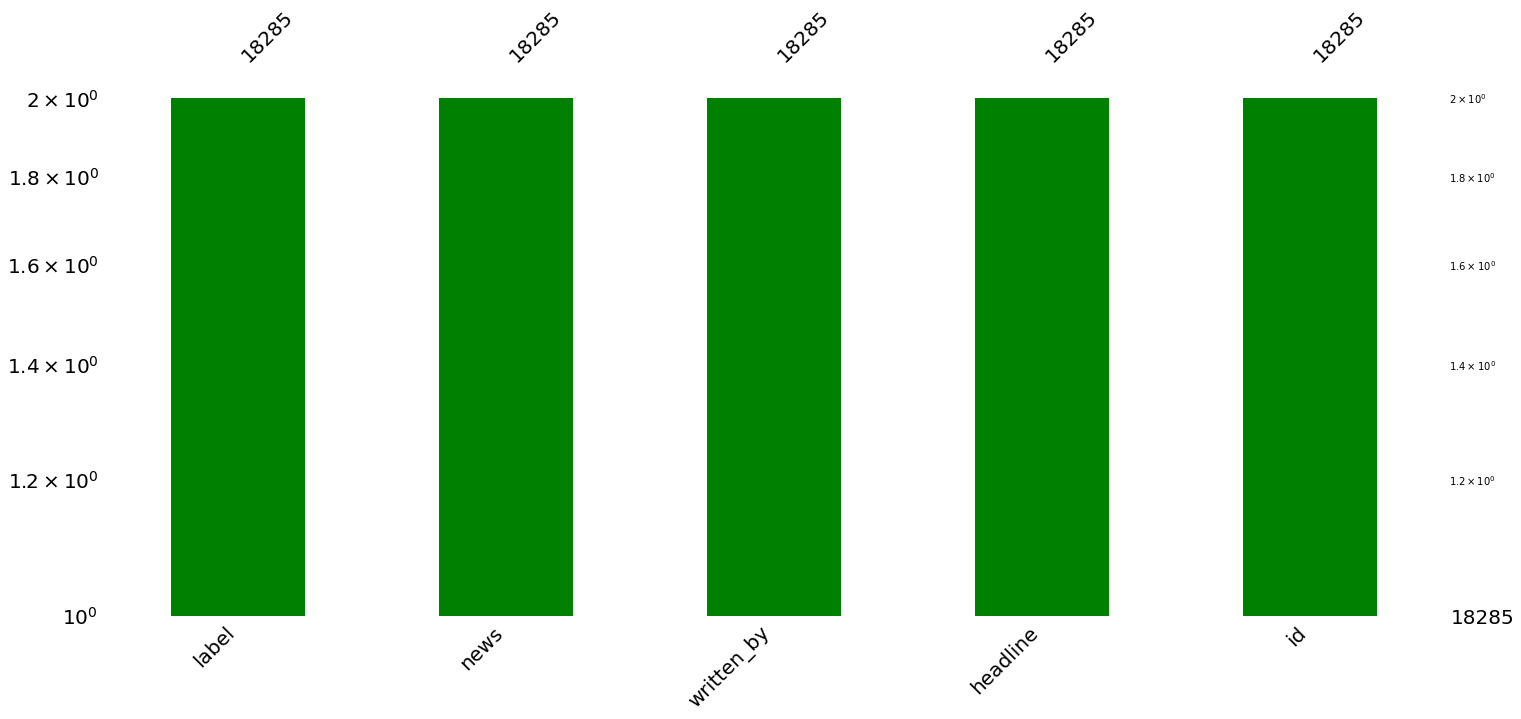

In [22]:
#Plotting the barplot to check whether null values are present anymore.
plt.figure(figsize=(12,6))
mnso.bar(df, fontsize=20,color='green',sort='descending',log=True)

In [23]:
#Checking the shape of the dataset
print("The shape of dataset means number of Rows and Columns:",df.shape)

The shape of dataset means number of Rows and Columns: (18285, 5)


In [24]:
#Checking the shape of the dataset after removing the null values
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 18285 observations and 5 features in this dataset. 



In [25]:
#Checking the number of unique headlines
print("There are {} unique headline in this dataset such as: \n\n{}...".format(len(df.headline.unique()),
                                                                           "\n\n".join(df.headline.unique()[0:5])))

There are 17931 unique headline in this dataset such as: 

Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times

U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times

Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart

Paul LePage, Besieged Maine Governor, Sends Conflicting Signals Over Intentions - The New York Times

A Digital 9/11 If Trump Wins...


In [26]:
#Checking the number of unique news
print("There are {} unique news in this dataset".format(df.news.nunique()))

There are 18017 unique news in this dataset


In [27]:
#Checking the number of unique writers
print("There are {} unique writers in this dataset".format(df.written_by.nunique()))

There are 3838 unique writers in this dataset


Observation: 
         
             There are 17931 headline and 18017 news articals. It seems that (18017-17931) = 86 news were duplicate 
             or may be rewritten by some other writers.

In [28]:
#Checking the distribution of the labels
print("Count of Real and Fake News:\n",df.label.value_counts())

Count of Real and Fake News:
 0    10361
1     7924
Name: label, dtype: int64


#### Observation : The maximum null values are present with respect to label 1 means for fake news.

#### Observation: Here 1 stands for Fake News and 0 stands for real news

In [29]:
#Checking the Ratio of the Labels
print("Real News Ratio:",round(len(df[df['label']==0])/len(df['label']),3)*100,'%')
print("Fake News Ratio:",round(len(df[df['label']==1])/len(df['label']),3)*100,'%')

Real News Ratio: 56.699999999999996 %
Fake News Ratio: 43.3 %


#### Observation: The dataset is balance. There is no need to balanced it...

In [30]:
#Creating the copy of the dataset for refrence
news=df.copy()
df.head(10)

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
10,11136,Is Hillary a Closet Drunk… New WikiLeak Email ...,V Saxena,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1
11,2150,BLOOMBERG-BACKED PENNSYLVANIA ATTORNEY GENERAL...,Iron Sheik,Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...,1


In [31]:
#Reseting the index

df.reset_index(inplace=True)
df.head(10)

,index,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
6,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
7,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
8,10,11136,Is Hillary a Closet Drunk… New WikiLeak Email ...,V Saxena,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1
9,11,2150,BLOOMBERG-BACKED PENNSYLVANIA ATTORNEY GENERAL...,Iron Sheik,Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...,1


In [32]:
#Creating the new column which is news_length before cleaning the news

df['news_length'] = df['news'].str.len()
df.head()

,index,id,headline,written_by,news,label,news_length
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164


## Data Cleaning Steps for news column

* Remove HTML tags

* Remove special characters

* Convert everything to lowercase

* Remove stopwords

* Stemming

In [34]:
import nltk
import string
from nltk.corpus import stopwords

print('The NLTK version is {}.'.format(nltk.__version__))

The NLTK version is 3.5.


In [35]:
#1. Remove HTML tags
#Regex rule : "<.*?>"

import re #For regex

def clean(text):
    cleaned = re.compile(r"<.*?>")
    return re.sub(cleaned," ",text)     #Substring replace with " "(space)

df.news = df.news.apply(clean)
df.news[2]

'Sunday on ABC’s “This Week,” while discussing the Republican plan to repeal and replace Obamacare Sen. Tom Cotton ( ) warned GOP House members “Do not walk the plank and vote for a bill that cannot pass the Senate and then have to face the consequences of that vote. ”  He added, “The bill probably can be fixed, but it’s going to take a lot of carpentry on that framework. ” (  The Hill) Follow Pam Key on Twitter @pamkeyNEN'

In [36]:
#2. Remove special character like punctuation
#We can use sttring.punctuation or manaully

def is_special(text):
    empty = ''
    for i in text:
        if i.isalnum():
            empty = empty + i
        else:
            empty = empty + ' '
    return empty

df.news = df.news.apply(is_special)
df.news[2]

'Sunday on ABC s  This Week   while discussing the Republican plan to repeal and replace Obamacare Sen  Tom Cotton     warned GOP House members  Do not walk the plank and vote for a bill that cannot pass the Senate and then have to face the consequences of that vote     He added   The bill probably can be fixed  but it s going to take a lot of carpentry on that framework       The Hill  Follow Pam Key on Twitter  pamkeyNEN'

In [37]:
#3. Convert everything to Lowercase
def lower(text):
    return text.lower()

df.news = df.news.apply(lower)
df.news[2]

'sunday on abc s  this week   while discussing the republican plan to repeal and replace obamacare sen  tom cotton     warned gop house members  do not walk the plank and vote for a bill that cannot pass the senate and then have to face the consequences of that vote     he added   the bill probably can be fixed  but it s going to take a lot of carpentry on that framework       the hill  follow pam key on twitter  pamkeynen'

In [38]:
#4. Removing the stopwords
from nltk.corpus import stopwords  #For stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df.news = df.news.apply(remove_stopwords)
df.news[2]

['sunday',
 'abc',
 'week',
 'discussing',
 'republican',
 'plan',
 'repeal',
 'replace',
 'obamacare',
 'sen',
 'tom',
 'cotton',
 'warned',
 'gop',
 'house',
 'members',
 'walk',
 'plank',
 'vote',
 'bill',
 'pass',
 'senate',
 'face',
 'consequences',
 'vote',
 'added',
 'bill',
 'probably',
 'fixed',
 'going',
 'take',
 'lot',
 'carpentry',
 'framework',
 'hill',
 'follow',
 'pam',
 'key',
 'twitter',
 'pamkeynen']

In [39]:
#5. Stemming
from nltk.stem import SnowballStemmer

def stem_text(text):
    snowball = SnowballStemmer('english')
    return " ".join([snowball.stem(w) for w in text])

df.news = df.news.apply(stem_text)
df.news[2]

'sunday abc week discuss republican plan repeal replac obamacar sen tom cotton warn gop hous member walk plank vote bill pass senat face consequ vote ad bill probabl fix go take lot carpentri framework hill follow pam key twitter pamkeynen'

In [40]:
# Creating new column (clean_length) after removing puncuations,stopwords from news column to check how much data is cleaned
df['clean_news_length'] = df.news.str.len()
df.head()

,index,id,headline,written_by,news,label,news_length,clean_news_length
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,washington sonni perdu tell georgian grow wear...,0,7936,4640
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,houston venezuela plan tactic approach design ...,0,6112,3725
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,sunday abc week discuss republican plan repeal...,0,425,238
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,augusta beleagu republican governor main seem ...,0,6516,3809
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,finian cunningham written extens intern affair...,1,9164,5784


In [41]:
#Total length removal
print("Origional Length:",df.news_length.sum())
print("Cleaned Length:",df.clean_news_length.sum())
print("Total Words Removed:",(df.news_length.sum()) - (df.clean_news_length.sum()))

Origional Length: 87771325
Cleaned Length: 52501459
Total Words Removed: 35269866


#### Observation: Here we see the origional length of our news column and cleaned length of our news columns and their difference means how much data is cleaned.

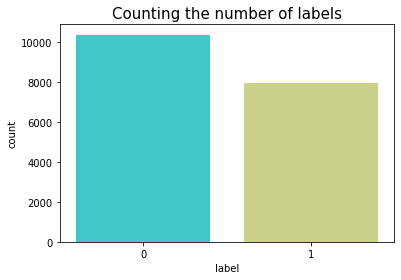

0    10361
1     7924
Name: label, dtype: int64


In [42]:
# Plotting the count of label.

plt.figure(figsize=(6,4))
sns.countplot(df['label'],palette= 'rainbow')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(df.label.value_counts())

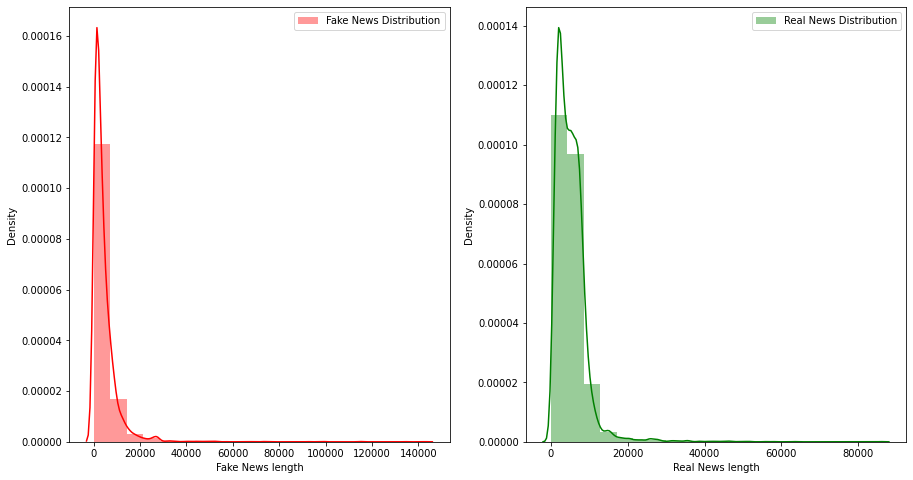

In [43]:
# Plotting the distribution of Message  before cleaning news

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['news_length'],bins=20, ax=ax[0],label='Fake News Distribution',color='r')
ax[0].set_xlabel('Fake News length')
ax[0].legend()

sns.distplot(df[df['label']==0]['news_length'],bins=20, ax=ax[1],label='Real News Distribution',color='g')
ax[1].set_xlabel('Real News length')
ax[1].legend()

plt.show()

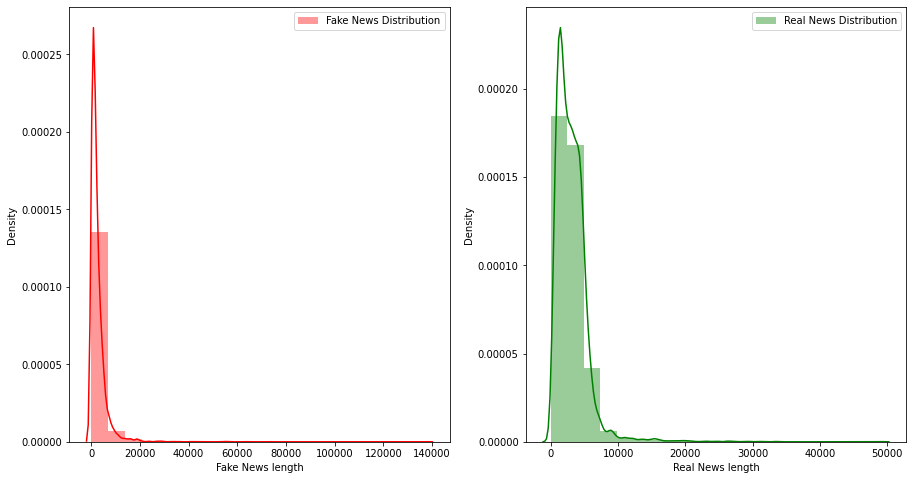

In [44]:
# Plotting the distribution of Message  after cleaning news

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['clean_news_length'],bins=20, ax=ax[0],label='Fake News Distribution',color='r')
ax[0].set_xlabel('Fake News length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_news_length'],bins=20, ax=ax[1],label='Real News Distribution',color='g')
ax[1].set_xlabel('Real News length')
ax[1].legend()

plt.show()

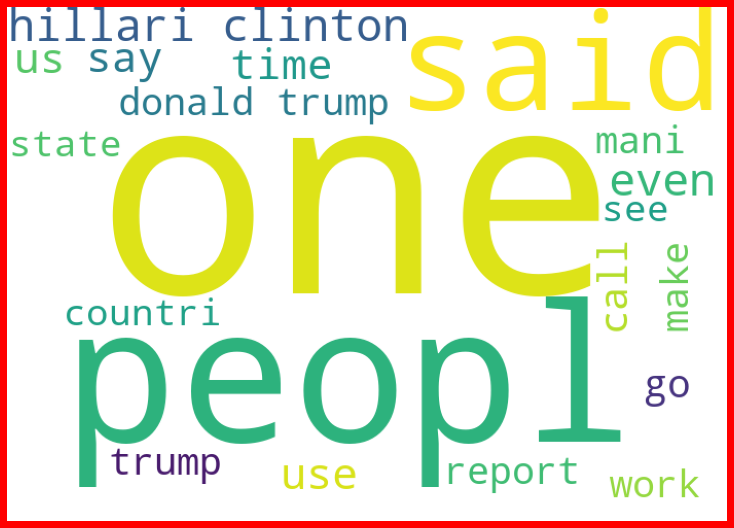

In [45]:
#Getting sense of loud words in Fake News

from wordcloud import WordCloud


spams = df['news'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

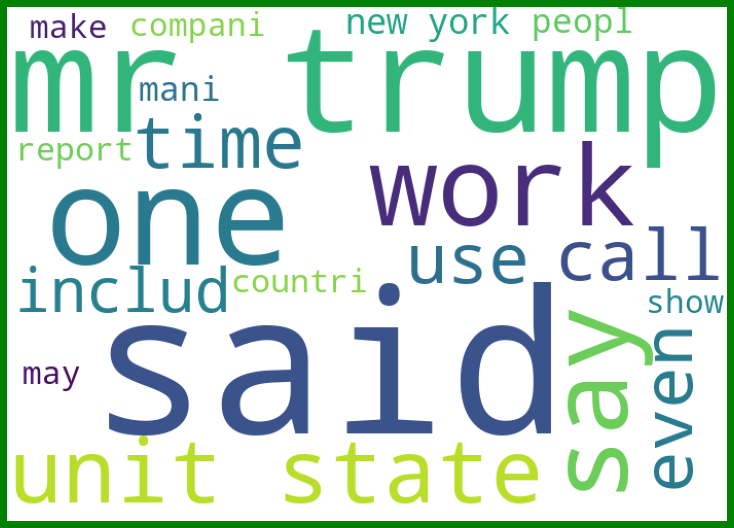

In [46]:
#Getting sense of loud words in Real News

from wordcloud import WordCloud


not_spams = df['news'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##  1- Converting the text into vectors using TF-IDF Vectorizer

In [47]:
# Importing the library and converting it into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()

#Independent Features
X = tf_vec.fit_transform(df['news'])

In [48]:
# Dependent Feature
y = df['label']

In [49]:
## Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

## Multinomial NB

Final score => 0.8958880139982502

 [[2479  119]
 [ 357 1617]]


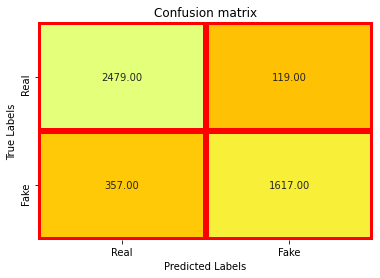

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2598
           1       0.93      0.82      0.87      1974

    accuracy                           0.90      4572
   macro avg       0.90      0.89      0.89      4572
weighted avg       0.90      0.90      0.89      4572



In [50]:
# Importing the library and Training the model
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB(alpha=0)
naive.fit(X_train,Y_train)

#Making Prediction
y_pred = naive.predict(x_test)

#Printing the Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#Accuracy Score
print('Final score =>', accuracy_score(y_test,y_pred))

#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
print("\n",conf_mat)

# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Wistia_r')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])
plt.show()

#Classification Report
print(classification_report(y_test, y_pred))

## Passive Aggressive Classifier Algorithm

Accuracy: 0.964

 [[2516   82]
 [  84 1890]]


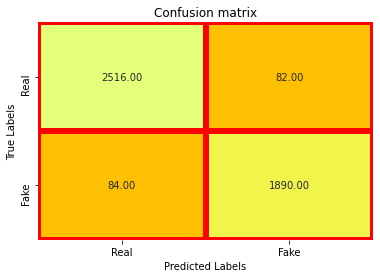

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2598
           1       0.96      0.96      0.96      1974

    accuracy                           0.96      4572
   macro avg       0.96      0.96      0.96      4572
weighted avg       0.96      0.96      0.96      4572



In [51]:
# Importing the Linrary
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier( validation_fraction=0.25,C=3, max_iter=1000, random_state=42, 
                                   n_iter_no_change=8,
                                   shuffle=True,
                                   loss='hinge',
                                   n_jobs=-1)

#Training the model
pac.fit(X_train,Y_train)

#Makeing prediction
pred = pac.predict(x_test)

#Accuracy
score = accuracy_score(y_test,pred)
print("Accuracy: %0.3f" %score)

#Confusion Matrix
cm = confusion_matrix(y_test,pred)
print('\n',cm)

# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Wistia_r')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])
plt.show()

#Classification Report
print(classification_report(y_test, pred))

In [52]:
## Get Features names for passive aggressive classifier
feature_names = tf_vec.get_feature_names()

In [53]:
pac.coef_[0]

array([-0.36376505,  0.44531458, -0.00805732, ...,  0.0599474 ,
        0.        ,  0.        ])

In [54]:
###  Seeing the Most real words in our news column
sorted(zip(pac.coef_[0], feature_names), reverse=True)[:20]

[(8.783121542170198, 'anti'),
 (7.601797977726782, 'octob'),
 (6.767445735888537, '2016'),
 (6.312363214626549, 'co'),
 (6.21664901408712, 'non'),
 (6.158941769112131, 'novemb'),
 (6.05059233455691, 'self'),
 (4.5487250731730775, 'hillari'),
 (4.4946348353918975, 'snip'),
 (4.457598931682831, 'sourc'),
 (4.395379204936733, 'howev'),
 (4.344381083011797, 'comment'),
 (4.255886120738973, 'via'),
 (4.156468102846369, 'us'),
 (4.04650479495699, 'old'),
 (3.874197204002121, 'share'),
 (3.8014578148885563, 'elect'),
 (3.7264672841165627, 'com'),
 (3.6861858129815004, '11'),
 (3.6729572946548634, 'al')]

In [55]:
### Seeing the Most fake words in our news column
sorted(zip(pac.coef_[0], feature_names))[:20]

[(-8.720406503487833, 'breitbart'),
 (-7.549244304950577, 'twitter'),
 (-6.980983070160902, 'said'),
 (-6.493167946903722, '2017'),
 (-5.858827468346115, 'ms'),
 (-5.40993532276014, 'mr'),
 (-4.402327823129867, 'mrs'),
 (-4.3918057522807485, 'follow'),
 (-3.516596366967803, 'last'),
 (-3.4487915201536103, 'milo'),
 (-3.2180221927401207, 'presid'),
 (-3.0181812931208736, 'saturday'),
 (-2.9970682071614694, 'app'),
 (-2.9584287781842047, 'administr'),
 (-2.9389958895441897, 'jeff'),
 (-2.8963088912969983, 'sunday'),
 (-2.8188945261227327, 'ap'),
 (-2.768286667010033, 'report'),
 (-2.7191759473744535, 'democrat'),
 (-2.7027601015715272, 'pamkeynen')]

## 2- Converting the Text using HashingVectorizer

In [56]:
# Importing the library and converting it into vectors
from sklearn.feature_extraction.text import HashingVectorizer
hs_vectorizer=HashingVectorizer(n_features=30000, binary=bool)

# Independent Features
X = hs_vectorizer.fit_transform(df['news']).toarray()

In [57]:
#Checking the shape of the independent features
X.shape

(18285, 30000)

In [58]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
# Dependent Features
y = df['label']

In [61]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## MultinomialNB

Final score => 0.8753189938024061


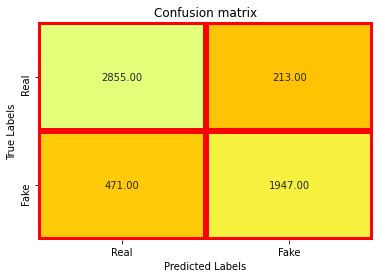

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3068
           1       0.90      0.81      0.85      2418

    accuracy                           0.88      5486
   macro avg       0.88      0.87      0.87      5486
weighted avg       0.88      0.88      0.87      5486



In [62]:
# Train the model
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB(alpha=0)
naive.fit(X_train,y_train)

#Making Prediction
y_pred = naive.predict(X_test)

#Printing the Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#Accuracy Score
print('Final score =>', accuracy_score(y_test,y_pred))

# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Wistia_r')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])
plt.show()

#Classification Report
print(classification_report(y_test, y_pred))

### Passive Aggressive Classifier Algorithm

Final score => 0.9582573824279985


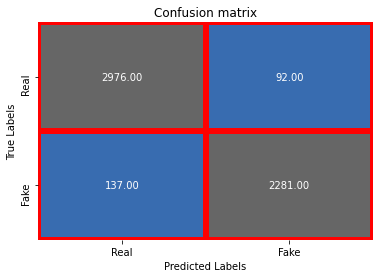

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3068
           1       0.96      0.94      0.95      2418

    accuracy                           0.96      5486
   macro avg       0.96      0.96      0.96      5486
weighted avg       0.96      0.96      0.96      5486



In [63]:
# Train the model
from sklearn.linear_model import PassiveAggressiveClassifier
pac_model = PassiveAggressiveClassifier( validation_fraction=0.25,C=3, max_iter=1000, random_state=42, 
                                         n_iter_no_change=8,
                                         shuffle=True,
                                         loss='hinge',
                                         n_jobs=-1)
pac_model.fit(X_train,y_train)

#Making Prediction
pred = pac_model.predict(X_test)

#Printing the Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#Accuracy Score
print('Final score =>', accuracy_score(y_test,pred))

# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Accent')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])
plt.show()

#Classification Report
print(classification_report(y_test,pred))

### Conclusion: In Between Multinomial NB and Passive Aggressive Classifier Algorithm using TFIDF and Hashing Vectorizer , Passive Aggressive Classifier with TFIDF gives the best result so we save this model as our final model..

## Saving the best Model

In [64]:
#Saving this model that is Passive Aggressive Classifier
import joblib

#Save the model as a pickle in a file
joblib.dump(pac,'Fake_News_Detection_TFIDF.csv')

['Fake_News_Detection_TFIDF.csv']

# Using LSTM OR Bidirectional LSTM

In [65]:
# Seeing the top five rows of our dataset
df.head()

,index,id,headline,written_by,news,label,news_length,clean_news_length
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,washington sonni perdu tell georgian grow wear...,0,7936,4640
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,houston venezuela plan tactic approach design ...,0,6112,3725
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,sunday abc week discuss republican plan repeal...,0,425,238
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,augusta beleagu republican governor main seem ...,0,6516,3809
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,finian cunningham written extens intern affair...,1,9164,5784


In [66]:
#Get the Independent Features
X = df['news']

In [67]:
#Get the independent Feature
y=df['label']

In [68]:
#Checking the shape
X.shape, y.shape

((18285,), (18285,))

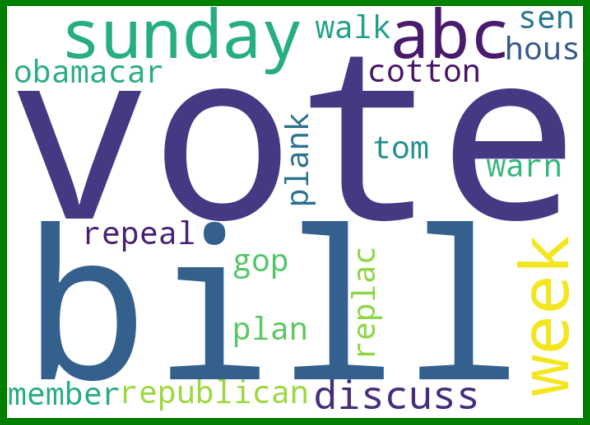

In [69]:
# Plotting the wordcloud for one index of news cloumn:
# Similarly we can plot different-2 world cloud for different-2 indexs of news column
from wordcloud import WordCloud
text = X[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(text)

# Display the generated image:
plt.figure(figsize=(8,6),facecolor='g')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Onehot Representation

In [70]:
#### Defining the Vocabulary Size
voc_size=500000

In [71]:
### Importing the tensorflow library and checking it's version
import tensorflow as tf

tf.__version__

'2.3.1'

In [72]:
# Importing the one hot encoder libary
from tensorflow.keras.preprocessing.text import one_hot

onehot_repr = [one_hot(words,voc_size) for words in X]
onehot_repr[2]

[495887,
 145318,
 207869,
 427907,
 336836,
 13612,
 418088,
 226836,
 393217,
 278337,
 31503,
 33091,
 462089,
 298662,
 114872,
 261966,
 174746,
 434885,
 92468,
 439684,
 383097,
 123491,
 46475,
 194875,
 92468,
 264701,
 439684,
 254722,
 476678,
 340446,
 364493,
 4653,
 408486,
 21323,
 463891,
 340684,
 231720,
 57824,
 75748,
 169961]

### Embedding Representation

In [73]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

sent_length=200
embedded_docs = pad_sequences(onehot_repr, padding ='pre', maxlen=sent_length)
print(embedded_docs)

[[463456 353935 261574 ... 243085 200236 109602]
 [159146 166559  55151 ... 339680 278913 339680]
 [     0      0      0 ...  57824  75748 169961]
 ...
 [ 97784 370687 207845 ... 336774 366507 172438]
 [181344 494633 165949 ... 455323 273128  74432]
 [     0      0      0 ... 407173 462722  94432]]


In [74]:
embedded_docs[2]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

## Creating LSTM/Bidirectional LSTM Model

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

# Defining the dimension of the sequence
embedding_vector_features = 150

# Creating Models
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
#model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 150)          75000000  
_________________________________________________________________
lstm (LSTM)                  (None, 100)               100400    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 75,100,501
Trainable params: 75,100,501
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
#Checking the shape of our Independent Features
embedded_docs.shape

(18285, 200)

In [77]:
# Checking the shape of our dependent features
y.shape

(18285,)

In [78]:
#Converting it into array
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [79]:
#Checking the shape
X_final.shape, y_final.shape

((18285, 200), (18285,))

In [80]:
## Divide the features into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final, test_size=0.33, random_state=42)

## Compilation of the model

In [82]:
#Compilation of the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Training

In [83]:
#Model Training
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, batch_size=75)

Epoch 1/10
164/164 [==============================] - 331s 2s/step - loss: 0.0552 - accuracy: 0.9828 - val_loss: 0.2548 - val_accuracy: 0.9327
Epoch 2/10
164/164 [==============================] - 307s 2s/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.3791 - val_accuracy: 0.9208
Epoch 3/10
164/164 [==============================] - 316s 2s/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.2542 - val_accuracy: 0.9354
Epoch 4/10
164/164 [==============================] - 331s 2s/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.2768 - val_accuracy: 0.9362
Epoch 5/10
164/164 [==============================] - 330s 2s/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.3105 - val_accuracy: 0.9274
Epoch 6/10
164/164 [==============================] - 312s 2s/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.3612 - val_accuracy: 0.9311
Epoch 7/10
164/164 [==============================] - 307s 2s/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.3211 - val_accuracy: 0.9339

## Performance Metrics And Accuracy


Final score => 0.9343827671913836

 [[3267  146]
 [ 250 2372]]


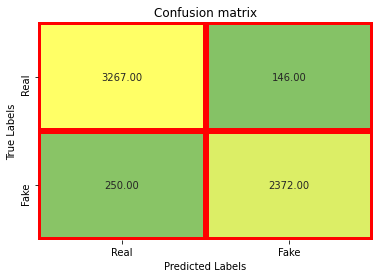

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3413
           1       0.94      0.90      0.92      2622

    accuracy                           0.93      6035
   macro avg       0.94      0.93      0.93      6035
weighted avg       0.93      0.93      0.93      6035



In [85]:
# Makeing prediction
pred_lstm = model.predict_classes(X_test)

#Accuracy Score
print('\nFinal score =>', accuracy_score(y_test,pred_lstm))

#Confusion Matrix
conf_mat = confusion_matrix(y_test,pred_lstm)
print("\n",conf_mat)

# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,pred_lstm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'summer')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])
plt.show()

#Classification Report
print(classification_report(y_test,pred_lstm))

## Save the model

In [86]:
# Saving the model
model.save(r"C:\Users\HP\Desktop\Internship\Project\NLP\Fake news project\Fake news project/FAKE_NEWS_MODEL.h5")  #h5 format

## Conclusion: Here in between LSTM and Bidirectional LSTM , LSTM model gives the best result.